This notebook analyzes data gathered from the Pokemon computer games. 

Section 1 reviews basic properties of the dataset.

Section 2 uses 10-fold cross validation to predict Pokemon type. 

Section 3 uses a simple neural network to predict Pokemon type.

## Section 1

In [1]:
import pandas as pd
dataset = pd.read_csv("csv/Pokemon.csv")

In [2]:
print(dataset.head(5))

   #                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False  


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(dataset["Total"])
plt.show()

<Figure size 640x480 with 1 Axes>

## Section 2

In [4]:
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

Simplify the dataset. For now, we will only consider primary-type, i.e. "Type 1". The names and ID numbers are also unnecessary.

In [5]:
dataset = dataset[['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','Legendary','Generation','Type 1']]

I remove pokemon with primary type 'flying' until I can incorporate more data. There are only three.

In [6]:
dataset = dataset[dataset['Type 1'] != 'Flying']

Current dataset has these columns:

In [7]:
print(dataset.head(5))

   HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Legendary  Generation Type 1
0  45      49       49       65       65     45      False           1  Grass
1  60      62       63       80       80     60      False           1  Grass
2  80      82       83      100      100     80      False           1  Grass
3  80     100      123      122      120     80      False           1  Grass
4  39      52       43       60       50     65      False           1   Fire


Break the dataset into X and Y, where Y=Y(X). Furthermore, creating the training set and the validation set.

In [8]:
array = dataset.values
X = array[:,0:8]
Y = array[:,8]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

The following code applies a variety of machine learning algorithms to the dataset. These algorithms will use the ability scores of a given pokemon to predict its primary type.

In [9]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
#set parameters
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=8, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.232832 (0.032424)
LDA: 0.237540 (0.040118)
KNN: 0.209059 (0.043557)
CART: 0.172963 (0.025784)
NB: 0.113212 (0.021731)
SVM: 0.146242 (0.019982)


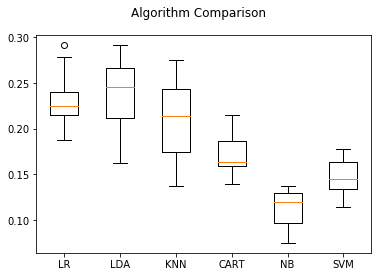

In [10]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Section 3

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = dataset.drop('Type 1',axis=1)
y = dataset['Type 1']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
StandardScaler(copy=True, with_mean=True, with_std=True)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

mlp = MLPClassifier(hidden_layer_sizes=(100,100,100,100),max_iter=100000,activation='identity')
mlp.fit(X_train,y_train)
predictions_identity = mlp.predict(X_test)
print(classification_report(y_test,predictions_identity))

              precision    recall  f1-score   support

         Bug       0.19      0.43      0.27        14
        Dark       0.00      0.00      0.00         5
      Dragon       0.14      0.18      0.16        11
    Electric       0.67      0.22      0.33         9
       Fairy       0.33      0.33      0.33         3
    Fighting       0.00      0.00      0.00         9
        Fire       0.30      0.20      0.24        15
       Ghost       0.00      0.00      0.00        12
       Grass       0.11      0.06      0.07        18
      Ground       0.67      0.18      0.29        11
         Ice       0.00      0.00      0.00         6
      Normal       0.42      0.52      0.46        31
      Poison       0.00      0.00      0.00         5
     Psychic       0.31      0.29      0.30        14
        Rock       0.25      0.20      0.22        10
       Steel       0.19      0.50      0.27         6
       Water       0.18      0.45      0.26        20

   micro avg       0.26   

In [16]:
mlp = MLPClassifier(hidden_layer_sizes=(100,100,100,100),max_iter=100000,activation='logistic')
mlp.fit(X_train,y_train)
predictions_logistic = mlp.predict(X_test)
print(classification_report(y_test,predictions_logistic))

              precision    recall  f1-score   support

         Bug       0.12      0.14      0.13        14
        Dark       0.12      0.20      0.15         5
      Dragon       0.17      0.18      0.17        11
    Electric       0.50      0.33      0.40         9
       Fairy       0.11      0.33      0.17         3
    Fighting       0.00      0.00      0.00         9
        Fire       0.19      0.20      0.19        15
       Ghost       0.60      0.25      0.35        12
       Grass       0.20      0.28      0.23        18
      Ground       0.14      0.09      0.11        11
         Ice       0.00      0.00      0.00         6
      Normal       0.40      0.32      0.36        31
      Poison       0.00      0.00      0.00         5
     Psychic       0.33      0.21      0.26        14
        Rock       0.15      0.20      0.17        10
       Steel       0.36      0.67      0.47         6
       Water       0.15      0.20      0.17        20

   micro avg       0.22   

In [17]:
mlp = MLPClassifier(hidden_layer_sizes=(100,100,100,100),max_iter=100000,activation='tanh')
mlp.fit(X_train,y_train)
predictions_tanh = mlp.predict(X_test)
print(classification_report(y_test,predictions_tanh))

              precision    recall  f1-score   support

         Bug       0.28      0.36      0.31        14
        Dark       0.12      0.20      0.15         5
      Dragon       0.36      0.36      0.36        11
    Electric       0.17      0.11      0.13         9
       Fairy       0.17      0.33      0.22         3
    Fighting       0.00      0.00      0.00         9
        Fire       0.13      0.13      0.13        15
       Ghost       0.60      0.25      0.35        12
       Grass       0.20      0.28      0.23        18
      Ground       0.75      0.27      0.40        11
         Ice       0.00      0.00      0.00         6
      Normal       0.46      0.42      0.44        31
      Poison       0.00      0.00      0.00         5
     Psychic       0.56      0.36      0.43        14
        Rock       0.14      0.10      0.12        10
       Steel       0.31      0.67      0.42         6
       Water       0.19      0.30      0.23        20

   micro avg       0.27   

In [18]:
mlp = MLPClassifier(hidden_layer_sizes=(100,100,100,100),max_iter=100000,activation='relu')
mlp.fit(X_train,y_train)
predictions_relu = mlp.predict(X_test)
print(classification_report(y_test,predictions_relu))

              precision    recall  f1-score   support

         Bug       0.17      0.29      0.22        14
        Dark       0.00      0.00      0.00         5
      Dragon       0.22      0.18      0.20        11
    Electric       0.25      0.22      0.24         9
       Fairy       0.00      0.00      0.00         3
    Fighting       0.00      0.00      0.00         9
        Fire       0.31      0.27      0.29        15
       Ghost       0.45      0.42      0.43        12
       Grass       0.11      0.06      0.07        18
      Ground       0.40      0.18      0.25        11
         Ice       0.00      0.00      0.00         6
      Normal       0.37      0.35      0.36        31
      Poison       0.00      0.00      0.00         5
     Psychic       0.27      0.21      0.24        14
        Rock       0.12      0.10      0.11        10
       Steel       0.19      0.50      0.27         6
       Water       0.19      0.30      0.23        20

   micro avg       0.22   

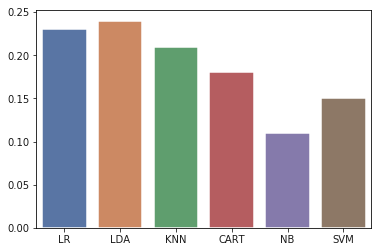

In [19]:
# Visualize results
labels = ['LR','LDA','KNN','CART','NB','SVM']
scores = [0.23,0.24,0.21,0.18,0.11,0.15]

fig, axs = plt.subplots(nrows=1, ncols=1)

sns.set(style="darkgrid", context="talk")
sns.barplot(x=labels, y=scores, ax=axs)

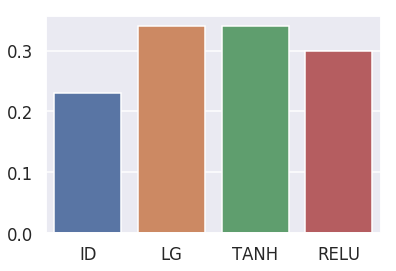

In [20]:
labels = ['ID','LG','TANH','RELU']
scores = [0.23,0.34,0.34,0.30]

fig, axs = plt.subplots(nrows=1, ncols=1)

sns.set(style="darkgrid", context="talk")
sns.barplot(x=labels, y=scores, ax=axs)

The MLP algorithms, in general, as good or better than the cross-validated algorithms. The plot above shows the precision of the various MLP across the different activation functions: 'identity' (ID), 'logistic' (LG), 'tanh', and 'relu'.